# Machine Recognition of Handwritten Numbers

## Packages

In [57]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import Isomap
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

## Importing datasource

In [58]:
# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
digits = datasets.load_digits()
# Print out `digits`
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

## Analysing the data source and its properties

In [59]:
# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape)

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print(digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits.target))

# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


There are 1797 samples and that there are 64 features. Because you have 1797 samples, you also have 1797 target values.

But all those target values contain 10 unique values, namely, from 0 to 9. In other words, all 1797 target values are made up of numbers that lie between 0 and 9. This means that the digits that your model will need to recognize are numbers from 0 to 9.

Lastly, you see that the images data contains three dimensions: there are 1797 instances that are 8 by 8 pixels big. You can visually check that the images and the data are related by reshaping the images array to two dimensions: digits.images.reshape((1797, 64)).

## Visualizing the images

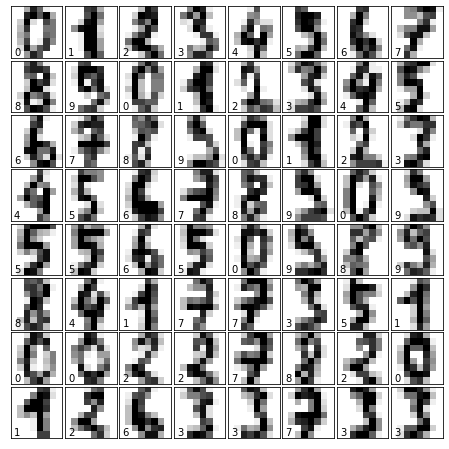

In [60]:
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Visualizing the target labels

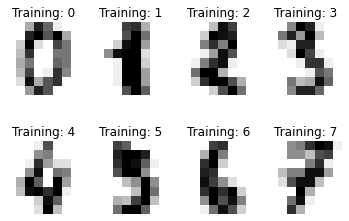

In [84]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

## Principal Component Analysis (PCA)

As the digits data set contains 64 features is necessary to apply one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables.

In [64]:
# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946953  21.2748939 ]
 [  7.95761939 -20.76872234]
 [  6.99192342  -9.95599109]
 ...
 [ 10.80127006  -6.96019931]
 [ -4.87210777  12.42397887]
 [ -0.34440954   6.36561864]]
[[ -1.25946694  21.27488421]
 [  7.9576109  -20.7686995 ]
 [  6.99192341  -9.95598756]
 ...
 [ 10.80128362  -6.9602499 ]
 [ -4.87210084  12.42395327]
 [ -0.34438904   6.36555133]]


Text(0, 0.5, 'Second Principal Component')

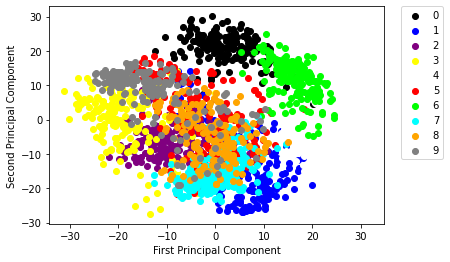

In [65]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Preprocessing the data

### Data Normalization

In [66]:
data = scale(digits.data)

### Data split for training and testing purposes
The approach here is to take 2/3 of the original data set as the training set, while the 1/3 that remains will compose the test set.

Also note that the argument random_state has the value 42 assigned to it. With this argument, the split will always be the same.

In [67]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [68]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
print(len(y_train))

1347
64
1347


## Modeling and Clustering

### K-means

In [86]:
# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data `X_train`to the model
clf.fit(X_train)

KMeans(n_clusters=10, random_state=42)

### Visualizing the clusters

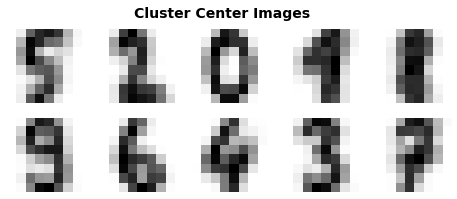

In [87]:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

### Predicting with the test set

In [88]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

[1 4 1 6 6 9 4 5 5 0 1 4 6 6 6 6 3 2 0 5 5 0 5 7 9 0 7 5 1 5 7 9 6 4 5 7 8
 4 2 3 4 6 9 9 3 2 9 6 1 3 5 6 9 5 2 2 5 4 6 8 2 1 8 7 1 5 9 6 5 4 4 8 0 3
 1 4 1 1 5 9 1 8 6 2 0 8 9 0 3 1 5 3 8 3 9 9 7 4 0 4]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8]


(10, 64)

### Visualizing the predicted vs actual values

Text(0.5, 1.0, 'Actual Training Labels')

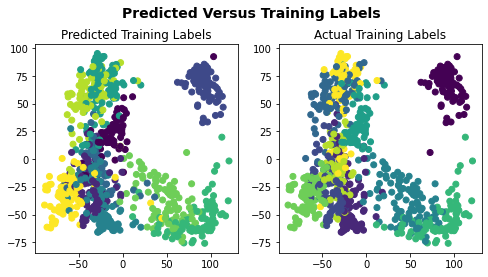

In [89]:
# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

At first sight, the visualization doesn’t seem to indicate that the model works well.

### Confusion Matrix

In [74]:
# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  7 10]
 [ 0  0  0 21  0  6  1  0  9  1]
 [ 0  0  4  2  0  1 38  0  1  0]
 [ 0 24  4  0  0  1  0  1  0 25]
 [ 0  2  6 22  0  4 25  0  0  0]
 [ 1 44  0  0  0  0  0  0  0  0]
 [ 0  0 34  2  0  0  0  5  0  0]
 [ 0  0  1  3  0 24 10  0  0  0]
 [ 0  0  4  0  0  0 41  0  0  3]]


Let’s try to figure out something more about the quality of the clusters by applying different cluster quality metrics.

In [75]:
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54173   0.557   0.633   0.593   0.401   0.576    0.118



- The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
- The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
- The V-measure score is the harmonic mean between homogeneity and completeness.
- The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.
- The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. If many points have a high value, the clustering configuration is good.


## Support Vector Machines

In [76]:
# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001, kernel='linear')

### Evaluating the Model

In [77]:
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9866480446927375
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


In [78]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.9911012235817576

### Predicting with the test set

In [80]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 5 8 4 7 5 4 9 2 9 4 7 6 8 9 1 3
 1 0 1 1 6 7 7 1 0 1 6 2 1 9 6 1 9 0 0 5 1 6 3 0 2 3 6 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 9 6 0 5 3 7 5 1 2 5 5 3 1 1 7 6 1 5 8 5 5 2 5 9 0 5 1 4 1 9
 5 8 9 7 9 8 2 6 5 2 5 1 1 1 7 0 6 1 5 5 9 9 5 9 5 5 7 5 6 2 8 6 5 6 1 5 1
 5 9 9 1 5 2 6 1 8 9 1 7 6 7 6 5 6 0 1 1 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 9 0
 9 9 9 0 1 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 1 3 9 0 9 5 9 2 1 5 2 1 6 1 9 2 6
 9 3 1 6 2 9 3 1 6 9 9 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 1 5 5 7
 0 9 1 6 5 9 9 6 3 8 0 3 6 5 6 9 2 6 1 8 1 6 6 7 5 2 1 5 3 2 6 6 9 6 5 7 3
 4 6 2 9 0 1 5 2 0 9 6 0 4 2 0 7 5 8 5 1 8 2 8 1 2 7 2 6 5 1 5 1 0 8 2 1 9
 5 6 1 2 7 2 1 5 1 6 1 5 0 9 1 1 1 7 0 1 9 0 5 4 8 1 8 6 5 9 4 6 6 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 6 6 0 7 7 6 2 0 6 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 8 3 2 1 5 5 9 1 3 7 0 0 9 0 7 5 9 9 3 6 8 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9 2 8 5 1 2 1 1 9 2 2 6 2 5 9 6 5 8 2 0 7 8 0 6 8 1 1 8 6 0 9 1
 2 0 4 5 8 3 9 1 8 3 4 5 

### Visualizing the first 4 predicted values

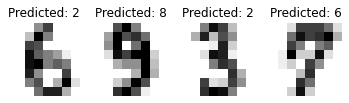

In [81]:
# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

### Confusion matrix

In [82]:
# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       0.65      1.00      0.79        90
           2       0.91      1.00      0.95        92
           3       1.00      0.52      0.68        93
           4       1.00      0.38      0.55        76
           5       0.84      0.99      0.91       108
           6       0.81      0.99      0.89        89
           7       0.95      0.81      0.88        78
           8       0.91      0.75      0.82        92
           9       0.72      0.87      0.79        92

    accuracy                           0.84       899
   macro avg       0.88      0.83      0.82       899
weighted avg       0.87      0.84      0.83       899

[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0   0   0   0]
 [  0   0  92   0   0   0   0   0   0   0]
 [  0   0   8  48   0   1   0   1   6  29]
 [  3  18   0   0  29   3  20   2   1   0]
 [  0   0   0   0   0 107 

### Visualizing the predicted vs actual values

Text(0.5, 0.98, 'Predicted versus actual labels')

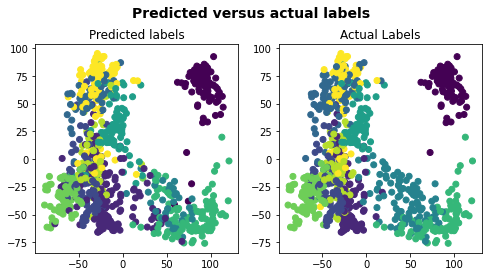

In [83]:
# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')